In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
crypto_news = pd.read_csv('drive/MyDrive/NLP/lab_one/cryptonews.csv')
print(crypto_news['sentiment'][0])
print(crypto_news['subject'][0])
alt_data = crypto_news.loc[crypto_news['subject'] == 'altcoin']

{'class': 'negative', 'polarity': -0.1, 'subjectivity': 0.6}


In [59]:
alt_data.head()

,date,sentiment,source,subject,text,title,url
0,2023-12-19 06:40:41,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...
10,2023-12-18 23:48:19,"{'class': 'positive', 'polarity': 0.01, 'subje...",CoinTelegraph,altcoin,"The new CEO, Josh Swihart, has been the vice p...",Zcash founder Zooko Wilcox steps down from Ele...,https://cointelegraph.com/news/zcash-founder-z...
13,2023-12-18 22:48:00,"{'class': 'positive', 'polarity': 0.6, 'subjec...",CryptoPotato,altcoin,Tether asserts to have effectively immobilized...,Tether Reveals Partnerships with Secret Servic...,https://cryptopotato.com/tether-reveals-partne...
14,2023-12-18 21:47:07,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,altcoin,Here is our weekly collection of digital asset...,Crypto Exchange Listing and Delisting Announce...,https://cryptonews.comhttps://cryptonews.com/n...
16,2023-12-18 20:56:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoPotato,altcoin,BEEG's adoption skyrockets as 37% is minted wi...,Avalanche Network Gas Fees Surge Linked to Tra...,https://cryptopotato.com/avalanche-network-gas...


Датасет, помимо необходимой информации (sentiment class, text, title), содержит информацию об источнике, типе криптовалюты и url. Sentiment содержит дополнительные значения polarity, subjectivity. Все перечисленное не понадобится

In [60]:
def preprocess_target(x):

	return str.lstrip(x[10:].split(', ')[0])

relevant_data = alt_data[['sentiment', 'text', 'title']]
relevant_data['sentiment'] = relevant_data['sentiment'].apply(preprocess_target)

relevant_data_crude = relevant_data.copy()

In [61]:
relevant_data.head()

,sentiment,text,title
0,'negative',Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...
10,'positive',"The new CEO, Josh Swihart, has been the vice p...",Zcash founder Zooko Wilcox steps down from Ele...
13,'positive',Tether asserts to have effectively immobilized...,Tether Reveals Partnerships with Secret Servic...
14,'neutral',Here is our weekly collection of digital asset...,Crypto Exchange Listing and Delisting Announce...
16,'neutral',BEEG's adoption skyrockets as 37% is minted wi...,Avalanche Network Gas Fees Surge Linked to Tra...


<Axes: xlabel='sentiment', ylabel='count'>

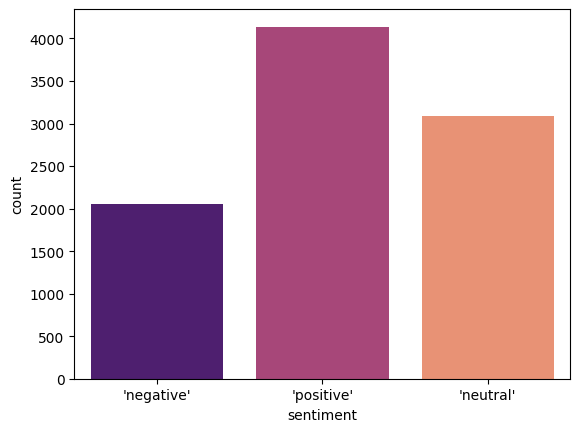

In [62]:
import seaborn as sns

sns.countplot(relevant_data, x="sentiment", palette="magma")

In [63]:
def words_stat(sent):

  for word in sent.split():
    words[word] = words.get(word, 0) + 1

words = {}
relevant_data['text'].apply(lambda x: words_stat(x))
sorted_words = sorted(words, key=words.get, reverse=True)
print('Топ слов:')
print(sorted_words)

Топ слов:
['the', 'to', 'of', 'a', 'and', 'in', 'has', 'The', 'is', 'crypto', 'for', 'its', 'on', 'that', 'as', 'with', 'by', 'price', 'are', 'market', 'will', 'have', 'from', 'be', 'cryptocurrency', 'it', 'digital', 'new', 'an', 'past', 'at', 'over', 'after', 'this', 'could', 'been', 'Bitcoin', 'trading', 'their', 'more', 'million', 'but', 'investors', 'US', '24', 'exchange', 'recent', 'token', 'up', 'some', 'was', 'FTX', 'not', 'Binance', 'last', 'about', 'asset', 'now', 'his', 'than', 'XRP', 'meme', 'said', 'hours,', 'into', 'out', 'A', 'coin', 'against', 'your', 'digest', 'which', 'daily,', 'bite-sized', 'blockchain-related', 'news.', 'Get', 'assets', 'one', 'USD', 'cryptoasset', 'SEC', 'may', 'Ethereum', 'we', 'latest', 'CEO', 'As', 'can', 'buy', '-', 'financial', 'tokens', 'above', 'users', 'most', 'support', 'Terra', 'following', 'platform', 'best', 'cryptocurrencies', 'Here', 'With', 'Shiba', 'two', 'potential', 'down', 'billion', 'week', 'other', 'continues', 'also', 'signific

Рассмотрим наиболее часто встречающиеся слова. В топе находится много предлогов, их вместе с другими стоп-словами необходимо удалить.

In [64]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

def remove_stop_words(sent):

  relevant_words = [x.lower() for x in sent.split() if x.lower() not in stop]
  return " ".join(relevant_words)

relevant_data['text'] = relevant_data['text'].apply(remove_stop_words)
relevant_data['title'] = relevant_data['title'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
words = {}
relevant_data['text'].apply(lambda x: words_stat(x))
sorted_words = sorted(words, key=words.get, reverse=True)
print('Топ слов после обработки:')
print(sorted_words)

non_alphas = []

for word in sorted_words:
  if len(non_alphas) > 100: break
  if not word.isalpha(): non_alphas.append(word)

print('Топ слов, содержащих что-то помимо букв:')
print(non_alphas)

Топ слов после обработки:
['crypto', 'price', 'market', 'cryptocurrency', 'digital', 'new', 'past', 'could', 'bitcoin', 'trading', 'exchange', 'million', 'investors', 'us', '24', 'token', 'recent', 'coin', 'ftx', 'binance', 'last', 'asset', 'meme', 'bank', 'get', 'xrp', 'one', 'said', 'hours,', 'may', 'financial', 'assets', 'digest', 'news.', 'daily,', 'bite-sized', 'blockchain-related', 'usd', 'ethereum', 'cryptoasset', 'following', 'despite', 'sec', 'latest', 'users', 'buy', 'ceo', 'cryptocurrencies', 'terra', '-', 'tokens', 'support', 'two', 'best', 'platform', 'major', 'shiba', 'amid', 'potential', 'since', 'week', 'first', 'billion', 'inu', 'continues', 'stablecoin', 'also', 'significant', 'central', 'exchanges', 'next', 'back', 'company', 'largest', 'dogecoin', 'coinbase', 'announced', 'top', 'regulatory', 'still', 'according', 'luna', 'set', 'another', 'many', 'coins', 'key', 'bullish', 'markets', 'leading', 'investment', 'worth', 'around', 'time', 'launch', 'industry', 'firm', 

Удалим знаки препинания с конца слов

In [66]:
def remove_symbols(sent):
  """
  Удаление ненужных знаков с конца слов
  """

  sent_words = sent.split()
  new_words = [word[:-1] if word[-1] in ['.', ',', ':', ';', '!', '?', '$'] else word for word in sent_words]

  return " ".join(new_words)

relevant_data['text'] = relevant_data['text'].apply(remove_symbols)
relevant_data['title'] = relevant_data['title'].apply(remove_symbols)

In [67]:
words = {}
relevant_data['text'].apply(lambda x: words_stat(x))
sorted_words = sorted(words, key=words.get, reverse=True)

non_alphas = []

for word in sorted_words:
  if len(non_alphas) > 100: break
  if not word.isalpha(): non_alphas.append(word)

print('Новый топ слов, содержащих что-то помимо букв:')
print(non_alphas)

Новый топ слов, содержащих что-то помимо букв:
['24', 'bite-sized', 'blockchain-related', '-', '2023', '2022', '\\x93', 'u.s', 'web3', 'pair-related', "bitcoin's", '$1', 'bankman-fried', '(btc)', "world's", 'co-founder', '–', "here's", '2021', 'today.have', 'and/or..', '(eth)', "ripple's", '(shib)', '(lunc)', '5%', '30%', '1%', 'on-chain', '10%', "sec's", '2%', "company's", "ftx's", '3%', '(cbdc)', '1.5%', "nation's", '20%', 'all-time', '1', '50%', '0.5%', '2', "binance's", 'world’s', '(sec)', '4%', 'long-term', 'near-term', '30', '$100', '2024', '(doge)', 'short-term', "musk's", '(ada)', 'cross-border', '(sol)', 'blue-chip', '15%', '10', '$10', '8%', '2.5%', '3', "exchange's", 'binance.us', '40%', '7%', '2.0', 'now-defunct', 'sec’s', "china's", '100', '20', '70%', 'best-performing', "country's", '12', "bankman-fried's", '$2', 'ftx’s', "xrp's", "russia's", "cryptocurrency's", '(defi)', '$30,000', '100%', "coinbase's", 'second-largest', '&', 'well-known', '11%', '$27,000', "cardano's", 

Наконец, стоит удалить числа вроде 2022, 24 и провести лемматизацию

In [68]:
import nltk
nltk.download('wordnet')

import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
pattern = re.compile("\$?\d+%?")

def lemm_no_num(sent):
  """
  Лемматизация и удаление чисел
  """
  sent_words = sent.split()
  new_words = [lemmatizer.lemmatize(word) for word in sent_words if not pattern.match(word)]

  return " ".join(new_words)

relevant_data['text'] = relevant_data['text'].apply(lemm_no_num)
relevant_data['title'] = relevant_data['title'].apply(lemm_no_num)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:
words = {}
relevant_data['text'].apply(lambda x: words_stat(x))
sorted_words = sorted(words, key=words.get, reverse=True)

non_alphas = []

for word in sorted_words:
  if len(non_alphas) > 100: break
  if not word.isalpha(): non_alphas.append(word)

print('Новый топ слов, содержащих что-то помимо букв:')
print(non_alphas)

Новый топ слов, содержащих что-то помимо букв:
['bite-sized', 'blockchain-related', '-', '\\x93', 'u.s', 'web3', 'pair-related', "bitcoin's", 'bankman-fried', '(btc)', "world's", 'co-founder', '–', "here's", 'today.have', 'and/or..', '(eth)', "ripple's", '(shib)', '(lunc)', 'on-chain', "sec's", "company's", "ftx's", '(cbdc)', "nation's", 'all-time', "binance's", 'world’s', '(sec)', 'long-term', 'near-term', '(doge)', 'short-term', "musk's", '(ada)', 'cross-border', '(sol)', 'blue-chip', "exchange's", 'binance.us', 'now-defunct', 'sec’s', "china's", 'best-performing', "country's", "bankman-fried's", 'ftx’s', "xrp's", "russia's", "cryptocurrency's", '(defi)', "coinbase's", 'second-largest', '&', 'well-known', "cardano's", '(usdt)', "korea's", "coin's", "today's", "terra's", "tether's", '—', 'low-cap', 'binance’s', "network's", "solana's", "token's", "bank's", 'token’s', "market's", 'play-to-earn', 'd2t', "kong's", 'sell-off', "firm's", "let's", '\\n\\nthis', 'america’s', 'non-fungible', 

In [70]:
offset = 20
for i in range(5):
  print(relevant_data['title'][offset+i])
  print(relevant_data['text'][offset+i])
  print(relevant_data['sentiment'][offset+i], '\n')

KeyError: 20

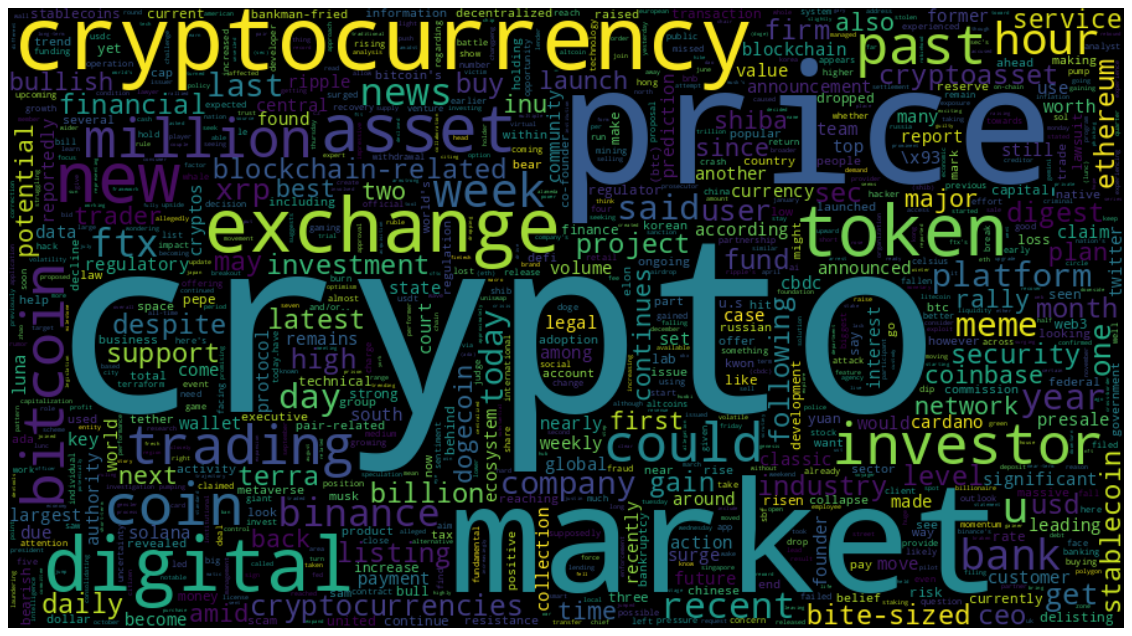

In [71]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=900, height=500, max_words=1628, relative_scaling=1, normalize_plurals=False).generate_from_frequencies(words)

plt.figure(figsize=(18, 16), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

relevant_data['all_text'] = relevant_data['text'] + relevant_data['title']

v = TfidfVectorizer()
X = v.fit_transform(relevant_data['all_text'])

encoder = LabelEncoder()
encoder.fit(relevant_data['sentiment'])
y = encoder.transform(relevant_data['sentiment'])

In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=302)
clf = SVC()
clf.fit(X_train, y_train)

SVC()

F1 score is:  0.5834645513861394


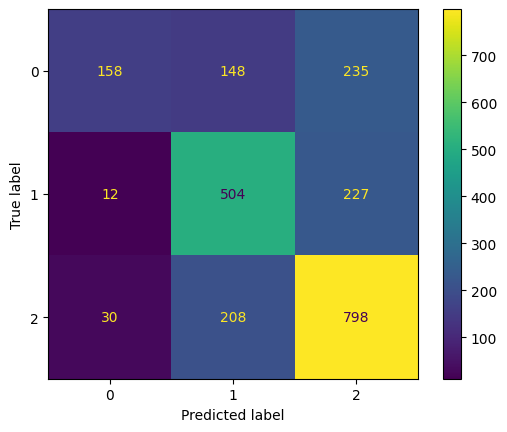

In [79]:
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score is: ', f1)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.471 total time=  13.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.466 total time=  15.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.470 total time=  12.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.467 total time=  13.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.471 total time=  12.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.446 total time=  12.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.446 total time=  13.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.445 total time=  12.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.446 total time=  11.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.446 total time=  11.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.446 total time=  12.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf